(torch.Size([2, 100]), torch.Size([100]))

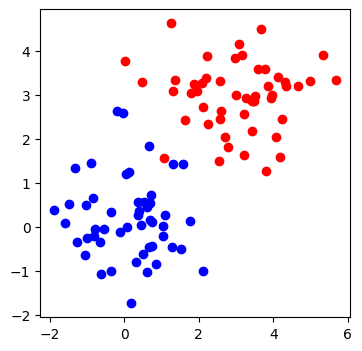

In [163]:
# trying to make a binary classifier

import torch
import matplotlib.pyplot as plt
import torch.nn.functional as F
%matplotlib inline
red = torch.randn((50,2)) + 3
blue = torch.randn((50,2))
plt.figure(figsize = (4,4))
plt.scatter(red[:,0],red[:,1],c="red")
plt.scatter(blue[:,0],blue[:,1],c="blue")


# inp = []
# out = []
# for i in range(50):
#     inp.extend([[red[i][0].item(),red[i][1].item()],[blue[i][0].item(),blue[i][1].item()]])
#     out.extend([1,-1])
# inp = torch.tensor(inp)
# out = torch.tensor(out)

inp = torch.cat([red[:,0],blue[:,0]])
inp = torch.stack((inp,torch.cat([red[:,1],blue[:,1]])))
out = torch.cat((torch.ones(50),torch.zeros(50))).int()
                  
W = torch.randn((2,2),requires_grad = True)
inp.shape , out.shape

In [261]:
logits = W @ inp
counts = logits.exp()
prob = counts/counts.sum(0,keepdim = True)
out.dtype
loss = -prob[out,torch.arange(len(inp[0]))].log().mean()
print(f'loss = {loss}')
W.grad = None
loss.backward()
W.data += -.3 * W.grad

loss = 0.4408482611179352


prob of being blue : 0.3249932825565338
prob of being blue : 0.6343984007835388
prob of being blue : 0.35067591071128845
prob of being blue : 0.5359085202217102
prob of being blue : 0.4749571979045868
prob of being blue : 0.7239483594894409
prob of being blue : 0.6570011973381042
prob of being blue : 0.5554789900779724
prob of being blue : 0.5700610280036926
prob of being blue : 0.7213960886001587
prob of being blue : 0.5896466970443726
prob of being blue : 0.42882058024406433
prob of being blue : 0.5486883521080017
prob of being blue : 0.5197186470031738
prob of being blue : 0.3846083879470825
prob of being blue : 0.42897945642471313
prob of being blue : 0.4901905357837677
prob of being blue : 0.7266866564750671
prob of being blue : 0.5579649806022644
prob of being blue : 0.49613526463508606
prob of being blue : 0.6158946752548218
prob of being blue : 0.6284347772598267
prob of being blue : 0.5588409304618835
prob of being blue : 0.45137956738471985
prob of being blue : 0.478472501039

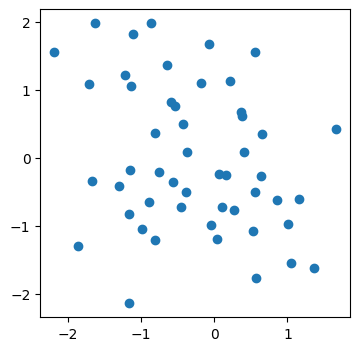

In [276]:
# red = torch.randn((50,2)) + 3
blue = torch.randn((50,2))
inp_test = torch.stack((blue[:,0],blue[:,1]))
plt.figure(figsize =(4,4))
plt.scatter(inp_test[0],inp_test[1])
logits = W @ inp_test
counts = logits.exp()
prob = counts/counts.sum(0,keepdim = True)

for i in range(len(prob[0])): 
    print(f'prob of being blue : {prob[0][i]}')
    # print(f'prob of being red : {prob[1][i]}')